In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

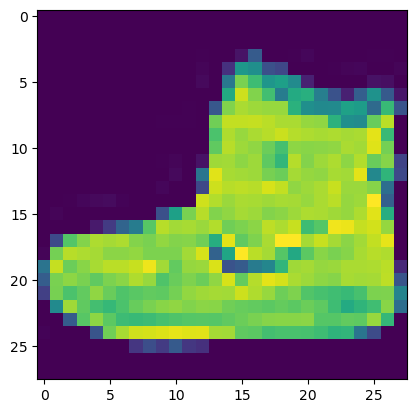

In [3]:
plt.imshow(X_train_full[0])

In [4]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [5]:
y_train_full[0]

9

In [6]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [7]:
class_names[y_train_full[0]]

'Ankle boot'

In [8]:
X_train_n = X_train_full/255
X_test_n = X_test/255

In [9]:
X_valid, X_train = X_train_n[:5000],X_train_n[5000:]
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test_n

# building and training model

In [10]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape = [28,28]))
model1.add(keras.layers.Dense(300,activation = 'relu'))
model1.add(keras.layers.Dense(100,activation = 'relu'))
model1.add(keras.layers.Dense(10,activation = 'softmax'))

In [11]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


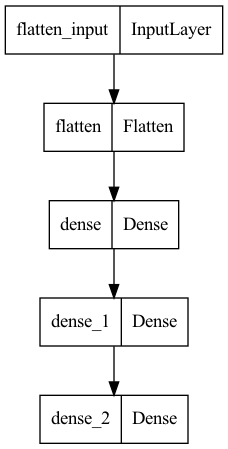

In [12]:
import pydot
keras.utils.plot_model(model1)

In [14]:
weights, biases = model1.layers[1].get_weights()

In [15]:
weights

array([[-0.05660067, -0.02188727, -0.05418453, ...,  0.04104436,
         0.01434465, -0.05578837],
       [ 0.05991414, -0.07031319, -0.06643142, ..., -0.02182861,
        -0.05392262,  0.03108452],
       [ 0.02280753, -0.03870192,  0.04669767, ..., -0.06650044,
         0.04366182,  0.02124859],
       ...,
       [ 0.01904167, -0.04914402,  0.06803825, ...,  0.04495494,
         0.02375662,  0.05025364],
       [-0.01550147,  0.0578863 , -0.01148286, ...,  0.05426528,
        -0.0148236 , -0.01816255],
       [-0.01304146,  0.04648998, -0.05642106, ..., -0.05959094,
        -0.07118123, -0.04372785]], dtype=float32)

In [16]:
weights.shape

(784, 300)

In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
biases.shape

(300,)

#TRAINING MODEL

In [19]:
model1.compile(loss="sparse_categorical_crossentropy",optimizer = "sgd", metrics = ["accuracy"])

In [22]:
model_history = model1.fit(X_train,y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 1s 612us/step - loss: 0.2228 - accuracy: 0.9205 - val_loss: 0.2901 - val_accuracy: 0.8978
Epoch 2/30
1719/1719 [==============================] - 1s 608us/step - loss: 0.2201 - accuracy: 0.9211 - val_loss: 0.3103 - val_accuracy: 0.8876
Epoch 3/30
1719/1719 [==============================] - 1s 602us/step - loss: 0.2160 - accuracy: 0.9228 - val_loss: 0.3193 - val_accuracy: 0.8834
Epoch 4/30
1719/1719 [==============================] - 1s 599us/step - loss: 0.2131 - accuracy: 0.9222 - val_loss: 0.3223 - val_accuracy: 0.8814
Epoch 5/30
1719/1719 [==============================] - 1s 595us/step - loss: 0.2105 - accuracy: 0.9245 - val_loss: 0.3027 - val_accuracy: 0.8872
Epoch 6/30
1719/1719 [==============================] - 1s 599us/step - loss: 0.2056 - accuracy: 0.9264 - val_loss: 0.2969 - val_accuracy: 0.8930
Epoch 7/30
1719/1719 [==============================] - 1s 599us/step - loss: 0.2028 - accuracy: 0.9274 - val_loss: 0.2928 -

In [25]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [26]:
model_history.history

{'loss': [0.22278936207294464,
  0.2201181948184967,
  0.21596232056617737,
  0.21306994557380676,
  0.21054531633853912,
  0.20557177066802979,
  0.20277723670005798,
  0.19931989908218384,
  0.1965293139219284,
  0.19301222264766693,
  0.19028761982917786,
  0.18707439303398132,
  0.18442295491695404,
  0.18201293051242828,
  0.1787085235118866,
  0.17570476233959198,
  0.17235803604125977,
  0.1698501706123352,
  0.16738764941692352,
  0.1661837249994278,
  0.16283324360847473,
  0.1596122831106186,
  0.15742823481559753,
  0.15427947044372559,
  0.1522381752729416,
  0.15039052069187164,
  0.14678595960140228,
  0.14504534006118774,
  0.14228135347366333,
  0.13879796862602234],
 'accuracy': [0.9204727411270142,
  0.9210909008979797,
  0.9228181838989258,
  0.9222363829612732,
  0.9244727492332458,
  0.9264363646507263,
  0.9273818135261536,
  0.928672730922699,
  0.9300363659858704,
  0.9305636286735535,
  0.931181788444519,
  0.9329817891120911,
  0.9344909191131592,
  0.93474543

#PLOT

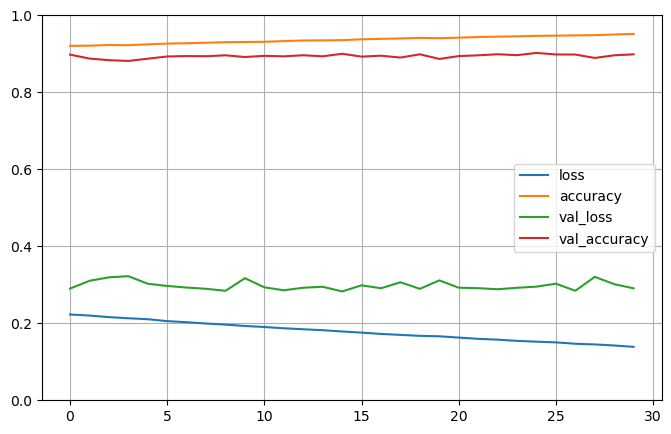

In [28]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Evaluation

In [29]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 0s 361us/step - loss: 0.3353 - accuracy: 0.8905


[0.3353286683559418, 0.890500009059906]

#PREDICTING

In [30]:
X_new = X_test[:3]

In [33]:
y_proba = model1.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 13ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [38]:
y_pred = np.argmax(model1.predict(X_new),axis = 1)
y_pred

1/1 [==============================] - 0s 13ms/step


array([9, 2, 1])

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')